<a href="https://colab.research.google.com/github/aiml460/460-AD/blob/main/AD_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [5]:
import pandas as pd
cars = pd.read_csv(r"/content/Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [7]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


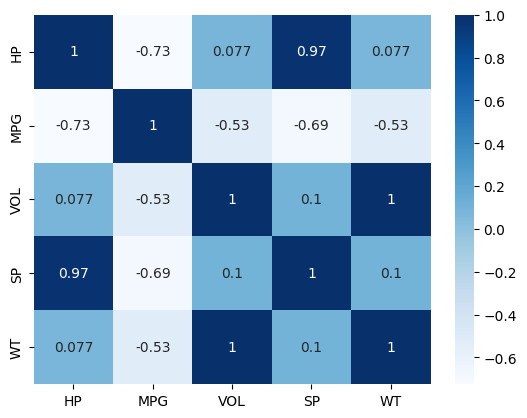

In [8]:
from seaborn import heatmap
sns.heatmap(cars.corr(),cmap='Blues',annot=True)
plt.show()

<Axes: xlabel='VOL', ylabel='MPG'>

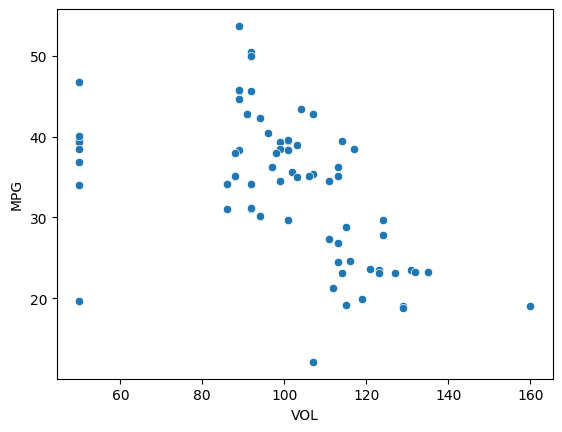

In [9]:
sns.scatterplot(x=cars['VOL'],y=cars['MPG'])

<Axes: xlabel='HP', ylabel='VOL'>

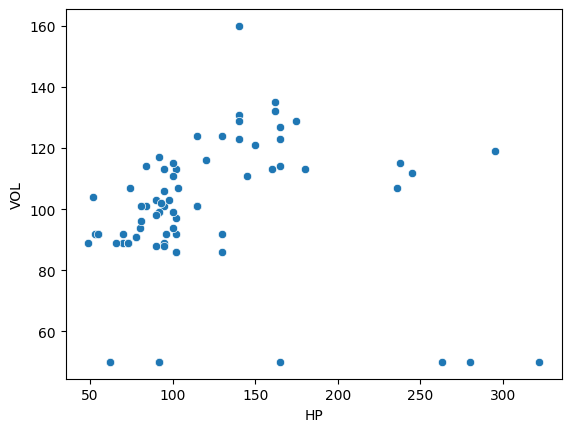

In [10]:
sns.scatterplot(x=cars['HP'],y=cars['VOL'])

<Axes: xlabel='HP', ylabel='SP'>

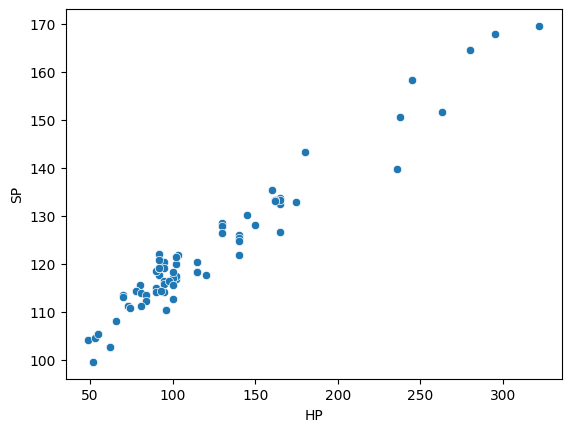

In [11]:
sns.scatterplot(x=cars['HP'],y=cars['SP'])

<Axes: xlabel='HP', ylabel='WT'>

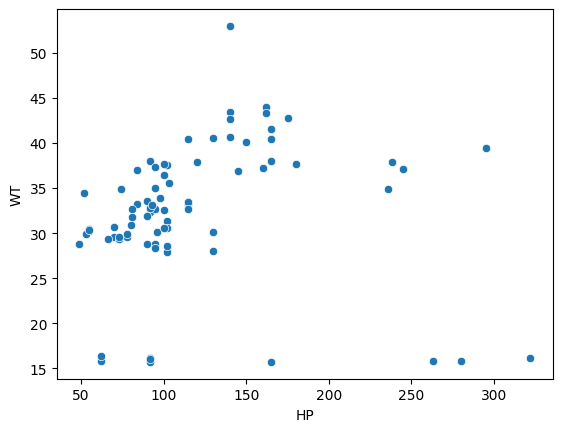

In [12]:
sns.scatterplot(x=cars['HP'],y=cars['WT'])

<Axes: xlabel='VOL', ylabel='SP'>

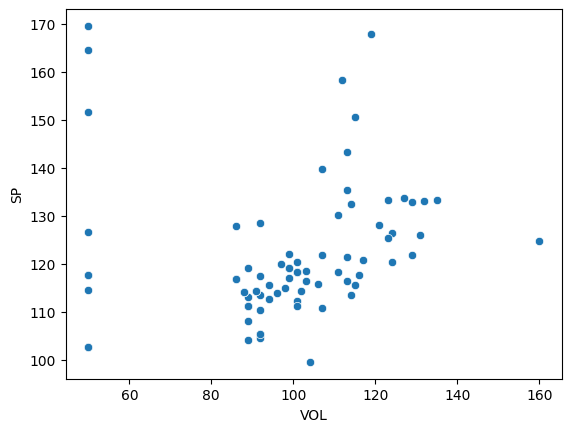

In [13]:
sns.scatterplot(x=cars['VOL'],y=cars['SP'])

<Axes: xlabel='VOL', ylabel='WT'>

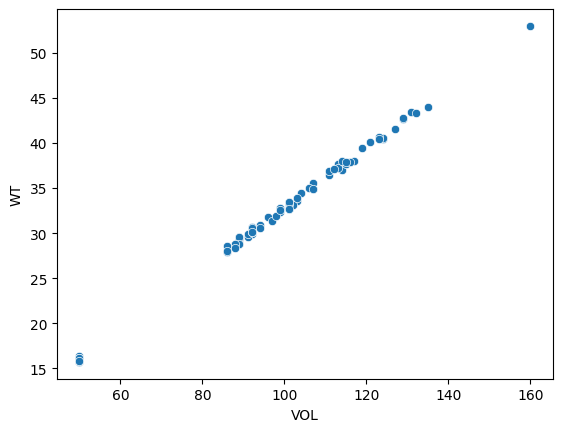

In [14]:
sns.scatterplot(x=cars['VOL'],y=cars['WT'])

<Axes: xlabel='SP', ylabel='WT'>

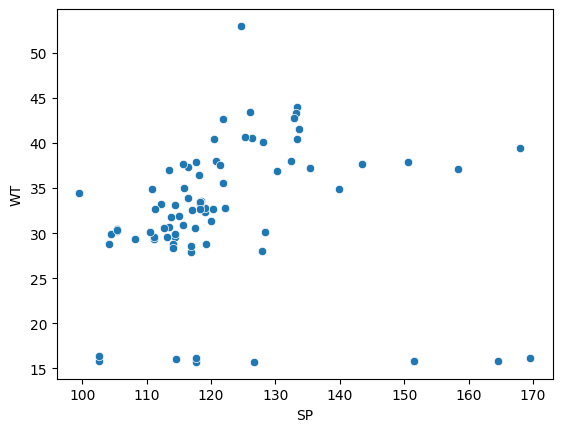

In [15]:
sns.scatterplot(x=cars['SP'],y=cars['WT'])

In [16]:
cars.sum()

,0
HP,9515.000000
MPG,2788.188134
VOL,8000.000000
SP,9844.762047
WT,2625.418730


In [17]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cars[['HP','WT','VOL','SP','MPG']]=sc.fit_transform(cars[['HP','WT','VOL','SP','MPG']])

In [20]:
np.round(cars.describe(),3)

,HP,MPG,VOL,SP,WT
count,81.000,81.000,81.000,81.000,81.000
mean,-0.000,0.000,0.000,0.000,0.000
std,1.006,1.006,1.006,1.006,1.006
min,-1.206,-2.460,-2.200,-1.559,-2.243
25%,-0.590,-0.724,-0.441,-0.547,-0.379
50%,-0.308,0.081,0.101,-0.236,0.043
75%,0.397,0.563,0.642,0.345,0.669
max,3.603,2.124,2.763,3.410,2.764


In [22]:
ml_V=smf.ols("MPG~VOL",data = cars).fit()
ml_V.rsquared

0.27990086511227064

In [23]:
ml_w=smf.ols("MPG~WT",data = cars).fit()
ml_w.rsquared

0.2774751389270126

In [25]:
ml_V.params

,0
Intercept,4.565258e-16
VOL,-5.290566e-01


In [26]:
ml_wV=smf.ols("MPG~WT+VOL",data = cars).fit()
ml_wV.rsquared

0.2821095616445981

In [32]:
ml_sp=smf.ols("MPG~VOL",data = cars).fit()
ml_sp.rsquared

0.27990086511227064

In [29]:
ml_HP=smf.ols("MPG~HP",data = cars).fit()
ml_HP.rsquared

0.5256806086282022

In [33]:
import statsmodels.formula.api as smf
model = smf.ols("MPG~VOL+WT+SP+HP",data = cars).fit()
model.rsquared

0.7705372737359844

In [34]:
model.params

,0
Intercept,3.767286e-16
VOL,-8.207285e-01
WT,3.286913e-01
SP,6.144215e-01
HP,-1.284968e+00


In [36]:
model.rsquared

0.7705372737359844